In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

### Reading data set

In [2]:
data=pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
data2=pd.get_dummies(data,columns=['Undergrad','Urban'])
data2.head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Urban_NO,Urban_YES
0,Single,68833,50047,10,1,0,0,1
1,Divorced,33700,134075,18,0,1,0,1
2,Married,36925,160205,30,1,0,0,1
3,Single,50190,193264,15,0,1,0,1
4,Married,81002,27533,28,1,0,1,0


In [4]:
data3=pd.get_dummies(data2,columns=['Marital.Status'])
data3.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Urban_NO,Urban_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,68833,50047,10,1,0,0,1,0,0,1
1,33700,134075,18,0,1,0,1,1,0,0
2,36925,160205,30,1,0,0,1,0,1,0
3,50190,193264,15,0,1,0,1,0,0,1
4,81002,27533,28,1,0,1,0,0,1,0


### If income<=3000 : Risky, income>3000: Good

In [5]:
def f(income):
    if income <= 3000:
        return 'Risky'
    elif income > 3000:
        return 'Good'
    else:
        pass

In [6]:
d=data3['Taxable.Income'].apply(f)

In [7]:
data3['Taxable.Income']=d

In [8]:
income_df=data3
income_df

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Urban_NO,Urban_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,Good,50047,10,1,0,0,1,0,0,1
1,Good,134075,18,0,1,0,1,1,0,0
2,Good,160205,30,1,0,0,1,0,1,0
3,Good,193264,15,0,1,0,1,0,0,1
4,Good,27533,28,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,Good,39492,7,0,1,0,1,1,0,0
596,Good,55369,2,0,1,0,1,1,0,0
597,Good,154058,0,1,0,0,1,1,0,0
598,Good,180083,17,0,1,1,0,0,1,0


In [9]:
data4=pd.get_dummies(data3,columns=['Taxable.Income'])
data4.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Urban_NO,Urban_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Taxable.Income_Good
0,50047,10,1,0,0,1,0,0,1,1
1,134075,18,0,1,0,1,1,0,0,1
2,160205,30,1,0,0,1,0,1,0,1
3,193264,15,0,1,0,1,0,0,1,1
4,27533,28,1,0,1,0,0,1,0,1


In [10]:
x=data4.iloc[:,0:7]
y=data4.iloc[:,7]

### Splitting data into train and test data

In [11]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42)

In [12]:
print(x_train.shape,y_train.shape, x_test.shape,y_test.shape)

(420, 7) (420,) (180, 7) (180,)


## Decision tree using Entropy criteria

In [31]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3,min_samples_split=2,min_samples_leaf=1,max_features='log2')
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2')

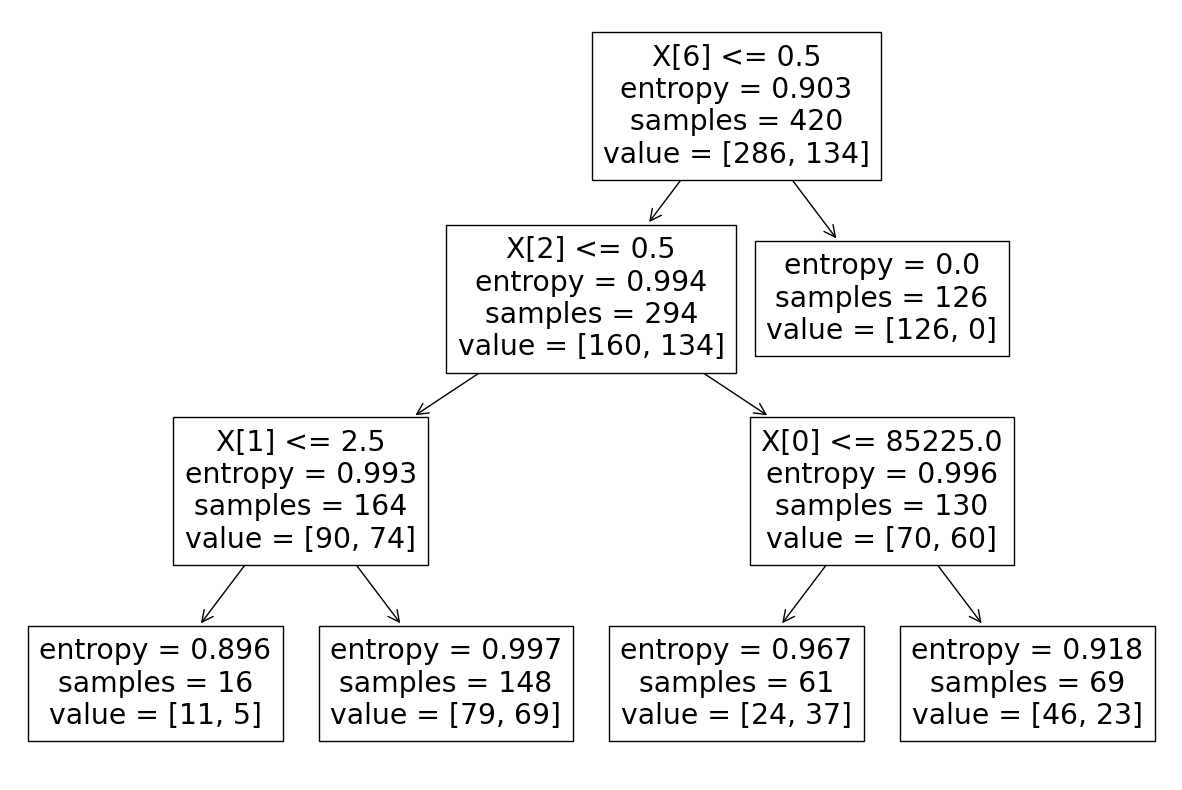

In [32]:
plt.figure(figsize =(15, 10)) 
tree.plot_tree(model1);

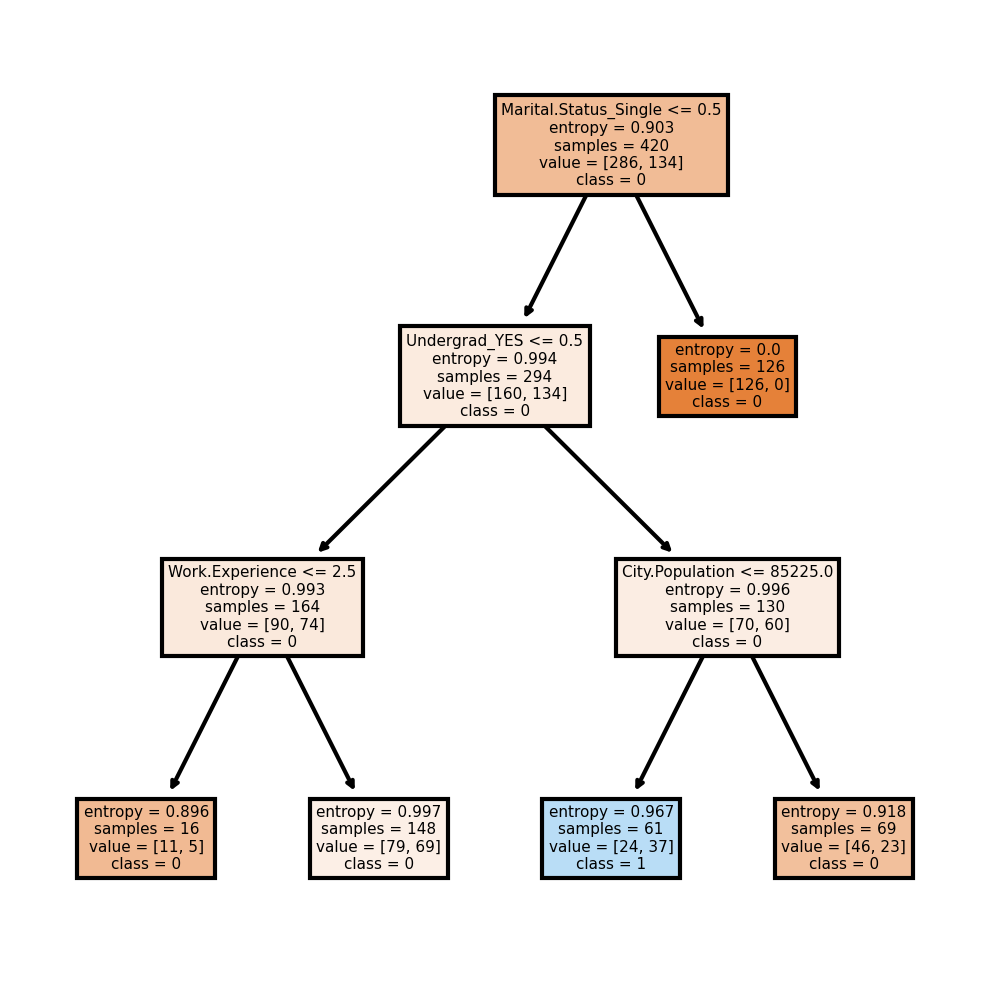

In [33]:
fn=['City.Population', 'Work.Experience', 'Undergrad_YES', 'Urban_YES',
       'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single']
cn=['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True);


In [34]:
preds = model1.predict(x_test) 
pd.Series(preds).value_counts() 

0    159
1     21
dtype: int64

In [35]:
pd.crosstab(y_test,preds)

col_0,0,1
Marital.Status_Married,,
0,111,9
1,48,12


In [36]:
np.mean(preds==y_test)

0.6833333333333333

## Decision tree using Gini impurity criteria

In [42]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3,min_samples_split=2,min_samples_leaf=1,max_features='log2')

In [43]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features='log2')

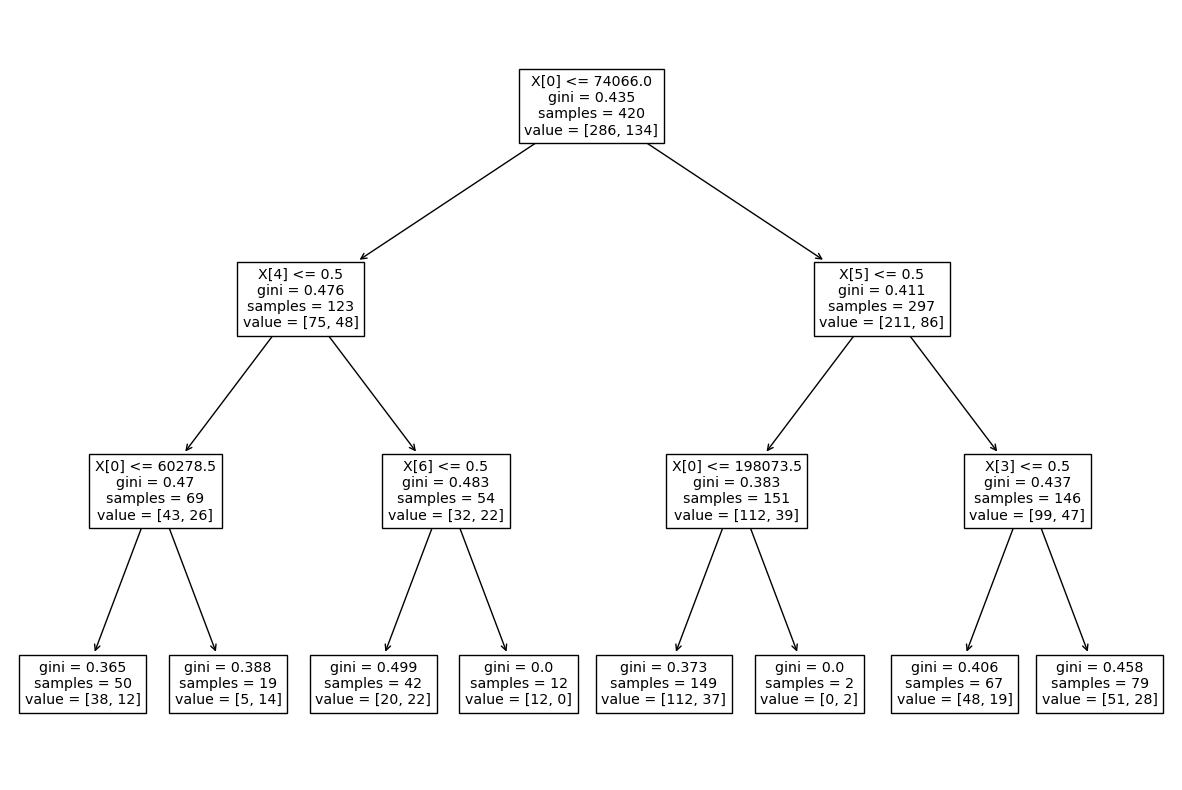

In [44]:
plt.figure(figsize =(15, 10)) 
tree.plot_tree(model_gini);

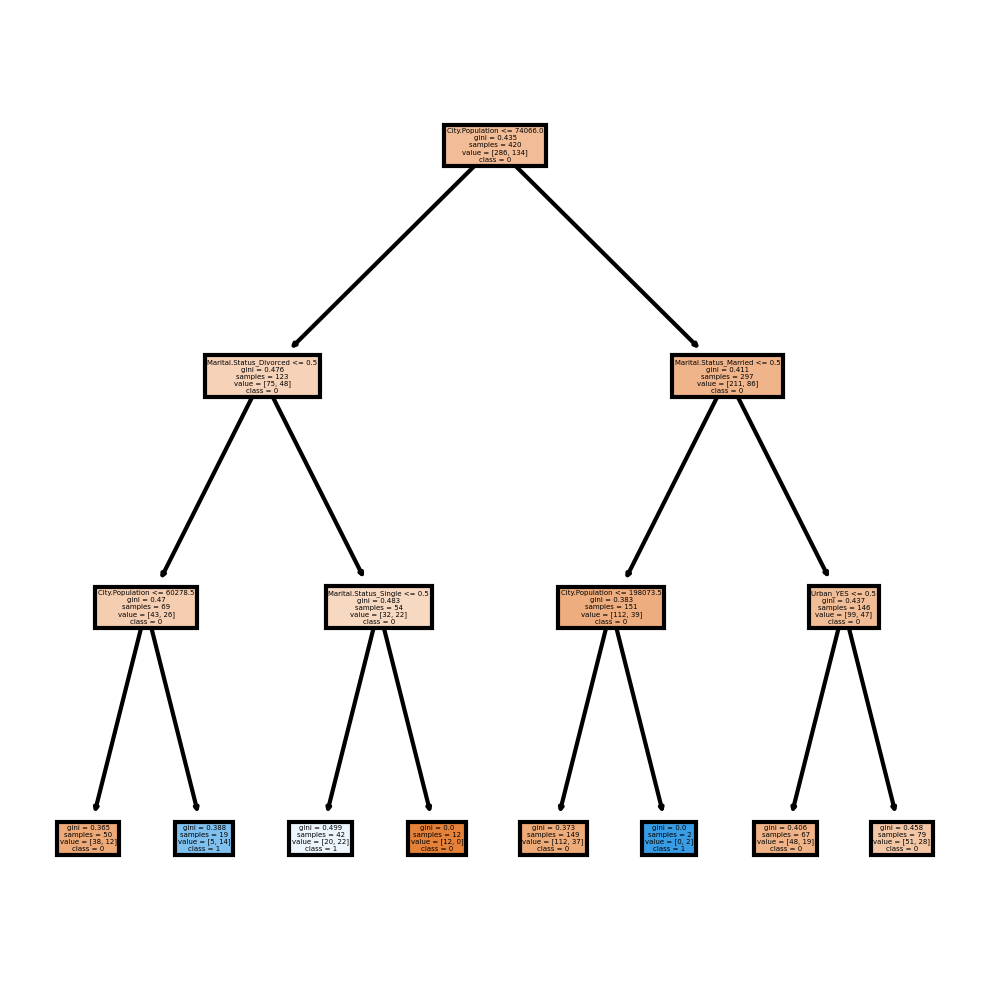

In [45]:
fn=['City.Population', 'Work.Experience', 'Undergrad_YES', 'Urban_YES',
       'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single']
cn=['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);


In [46]:
pred=model_gini.predict(x_test)
pred
np.mean(pred==y_test)

0.6333333333333333